# Edge detection
### Canny filter
### Morphological operator
## Tasks
* Try different thresholds for binarization (lena)
* Apply skeletonize, erosion to bin images (lena,camera)
* Apply canny filter (lena, camera)


### Binarization

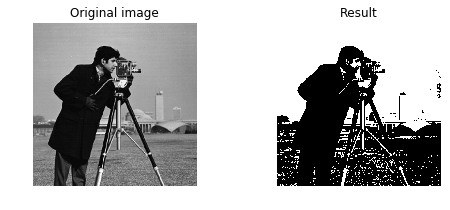

In [1]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
image = data.camera()
tt = np.median(image)
binary = image > tt

fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Result')

for a in ax:
    a.axis('off')

plt.show()

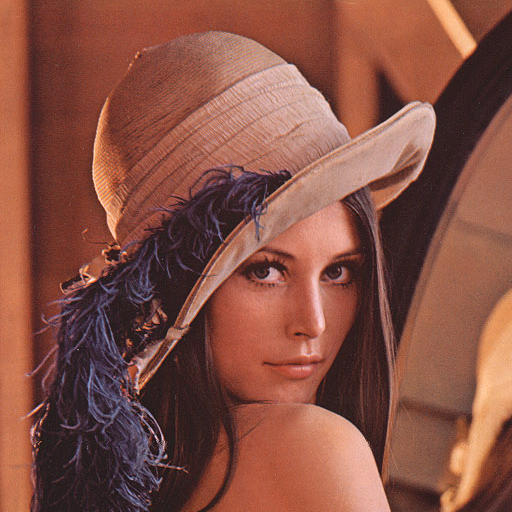

### Example of canny filter

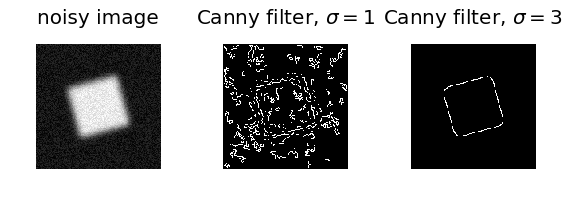

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature


# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

In [3]:
import os
import matplotlib.pyplot as plt
from skimage.data import data_dir
from skimage.util import img_as_ubyte
from skimage import io


def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax1.set_adjustable('box-forced')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    ax2.set_adjustable('box-forced')
    plt.show()

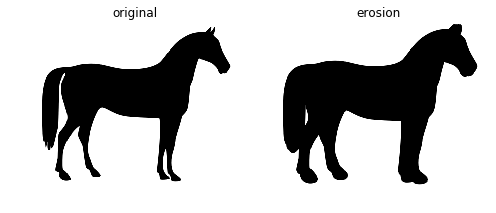

In [4]:
import os
from skimage import io
import matplotlib.pyplot as plt

from skimage.morphology import disk
from skimage.morphology import erosion, dilation, opening, closing
horse = io.imread(os.path.join(data_dir, "horse.png"), as_grey=True)
selem = disk(6)
eroded = erosion(horse, selem)
plot_comparison(horse, eroded, 'erosion')

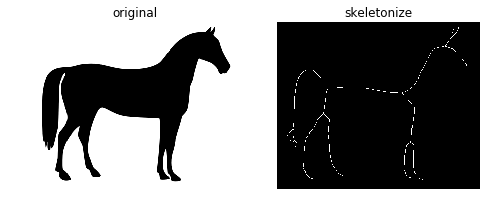

In [5]:
import os



from skimage import io
from skimage.data import data_dir
import matplotlib.pyplot as plt
from skimage.morphology import disk
from skimage.morphology import erosion, skeletonize, opening, closing
horse = io.imread(os.path.join(data_dir, "horse.png"), as_grey=True)
selem = disk(6)
sk = skeletonize(horse == 0)
plot_comparison(horse, sk, 'skeletonize')

142.0
116.0


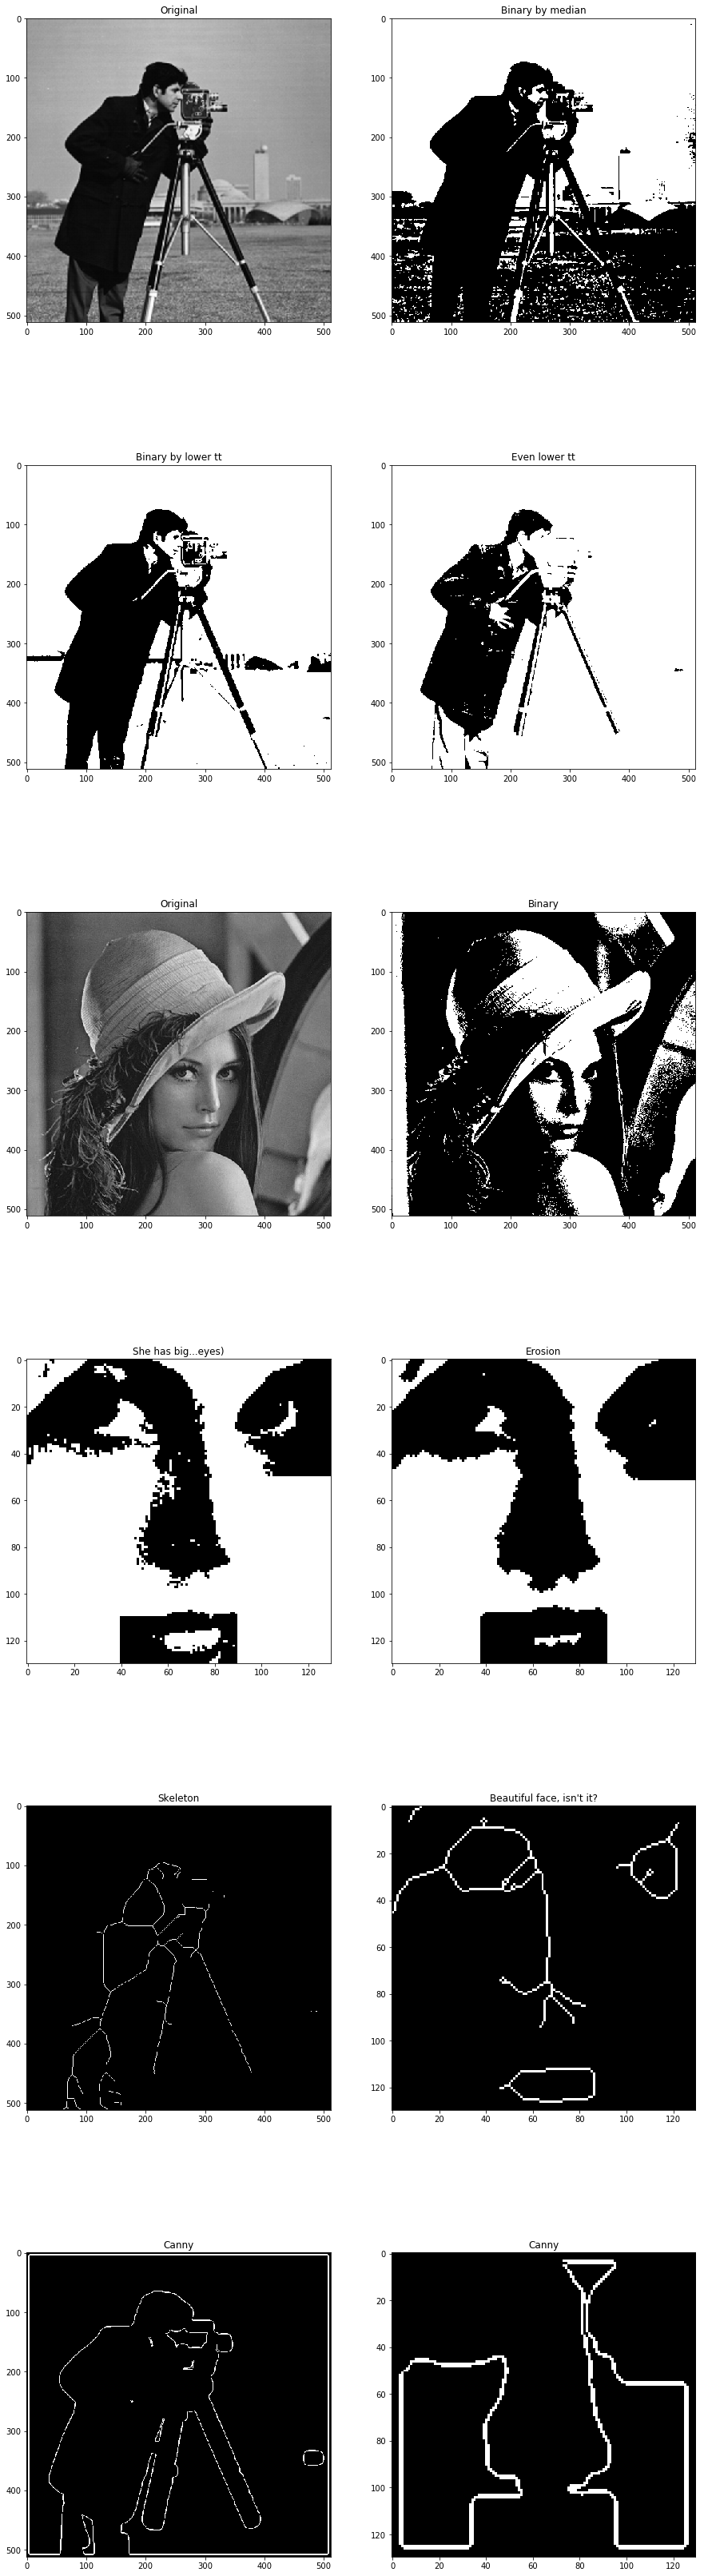

In [87]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from scipy import ndimage as ndimg
from PIL import Image
import math
from skimage import data
from skimage import feature

# Initialize
fig = plt.figure(figsize=(15,60))
cameraman = data.camera()
lena = img.imread('lena_cover.jpg')
glena = Image.open('lena_cover.png').convert('L')


# Binary cameraman
tt_cameraman = np.median(cameraman)
print(tt_cameraman)
b1_cameraman = cameraman > tt_cameraman

tt_cameraman = tt_cameraman - 70
b2_cameraman = cameraman > tt_cameraman

tt_cameraman = tt_cameraman - 55
b3_cameraman = cameraman > tt_cameraman


# Binary lena
tt_glena = np.median(glena) + 20
print(tt_glena)
b1_glena = glena > tt_glena
b11_glena = glena > tt_glena

# She has big...eyes
b2_glena = b11_glena[250:380, 230:360,]
b2_glena[45:130, 0:40,] = np.ones((85,40))
b2_glena[50:130, 90:130,] = np.ones((80,40)) 
b2_glena[90:110, 40:60,] = np.ones((20,20))


# Erosion
selem = disk(6)
e_cameraman = erosion(b3_cameraman, selem)

selem = disk(2)
e_glena = erosion(b2_glena, selem)

# Skeletonization
sk_cameraman = skeletonize(e_cameraman == 0)
sk_glena = skeletonize(e_glena == 0)


# Canny filter
c_cameraman = feature.canny(e_cameraman, sigma=1)
c_glena = feature.canny(e_glena, sigma=1)


# Plotting
plt.subplot(6, 2, 1)
plt.imshow(cameraman, cmap='gray')
plt.title('Original')

plt.subplot(6, 2, 2)
plt.imshow(b1_cameraman, cmap='gray')
plt.title('Binary by median')

plt.subplot(6, 2, 3)
plt.imshow(b2_cameraman, cmap='gray')
plt.title('Binary by lower tt')

plt.subplot(6, 2, 4)
plt.imshow(b3_cameraman, cmap='gray')
plt.title('Even lower tt')

plt.subplot(6, 2, 5)
plt.imshow(glena, cmap='gray')
plt.title('Original')

plt.subplot(6, 2, 6)
plt.imshow(b1_glena, cmap='gray')
plt.title('Binary')

plt.subplot(6, 2, 7)
plt.imshow(b2_glena, cmap='gray')
plt.title('She has big...eyes)')

plt.subplot(6, 2, 8)
plt.imshow(e_cameraman, cmap='gray')
plt.title('Erosion')

plt.subplot(6, 2, 8)
plt.imshow(e_glena, cmap='gray')
plt.title('Erosion')

plt.subplot(6, 2, 9)
plt.imshow(sk_cameraman, cmap='gray')
plt.title('Skeleton')

plt.subplot(6, 2, 10)
plt.imshow(sk_glena, cmap='gray')
plt.title('Beautiful face, isn\'t it?')

plt.subplot(6, 2, 11)
plt.imshow(c_cameraman, cmap='gray')
plt.title('Canny')

plt.subplot(6, 2, 12)
plt.imshow(c_glena, cmap='gray')
plt.title('Canny')


plt.show()

In [ ]:
/